In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

earthhours = {2018:'24-Mar', 2019:'30-Mar', 2020:'28-Mar', 2021:'27-Mar', 2022:'26-Mar'}
i_sm = {1: 0.9579037796074662,
    2: 0.9596186164365493,
    3: 0.9898073559402792,
    4: 1.0030397134620446,
    5: 1.018392643199991,
    6: 1.0261222064430728,
    7: 1.02305328000198,
    8: 1.017260959899729,
    9: 1.020519376655325,
    10: 1.011875522378184,
    11: 0.9942104067376999,
    12: 0.976059327973805}

In [46]:
def robust_method(year):
    """deseasonalizing all the saturdays of an year and then calculating the ratio"""
    df = pd.read_excel(f'Yearly Energy Demand Data/System Demand (Actual)/{year}.xlsx', index_col=0)
    df.columns = pd.to_datetime(df.columns, dayfirst=True)
    # earthhour = sum(df[str(year)+f'-{earthhours[year]} 00:00:00']['21:00':'21:30'])
    saturdays = {}
    for i in df.columns:
        if i.weekday() == 5:
            saturdays[i] = sum(df[i]['21:00':'21:30'])
    saturdays = pd.Series(saturdays)

    i_sm = {1: 0.9579037796074662,
        2: 0.9596186164365493,
        3: 0.9898073559402792,
        4: 1.0030397134620446,
        5: 1.018392643199991,
        6: 1.0261222064430728,
        7: 1.02305328000198,
        8: 1.017260959899729,
        9: 1.020519376655325,
        10: 1.011875522378184,
        11: 0.9942104067376999,
        12: 0.976059327973805}
    
    # deseasonalize the data
    deseasonalized = saturdays.copy()
    for i in deseasonalized.index:
        deseasonalized[i] = deseasonalized[i] / i_sm[i.month]

    print(deseasonalized.index[-1],deseasonalized[-1])

The data points which were not previously included as they are included in the previous year's sheet.

In [47]:
robust_method(2018)
robust_method(2019)
robust_method(2020)
robust_method(2021)
robust_method(2022)

2019-01-05 00:00:00 13020.848418700294
2020-01-04 00:00:00 12885.330684448634
2021-01-02 00:00:00 11997.317737143843
2022-01-01 00:00:00 12944.15790327006
2022-12-31 00:00:00 12987.278036317732


In [48]:
data = {}
for year in range(2018, 2023):
    df = pd.read_excel('PBData.xlsx', sheet_name=str(year), index_col=0)
    df.columns = ['Demand']
    data[year] = df

In [49]:
year = 2018
earthhour = data[year]

In [50]:
data[2018].loc['24-Mar']

Demand    12351.793874
Name: 24-Mar, dtype: float64

In [53]:
def controlchart(year):
    mean = np.mean(data[year]['Demand'])
    std = np.std(data[year]['Demand'])  
    ucl = mean + 3*std
    lcl = mean - 3*std

    plt.figure(figsize=(10, 5))
    plt.plot(data[year].index, data[year]['Demand'])
    plt.scatter(earthhours[year], data[year].loc[earthhours[year]], color='purple', label = 'Earth Hour')
    plt.axhline(mean, color='green', label='Mean')
    plt.axhline(ucl, color='red', label='UCL')
    plt.axhline(lcl, color='red', label='LCL')
    plt.title(f'Saturday 20:30-21:30 Demand {year}')
    # plt.xlabel('Date')
    plt.ylabel('Demand (KWh)')
    plt.xticks([])
    plt.legend()
    

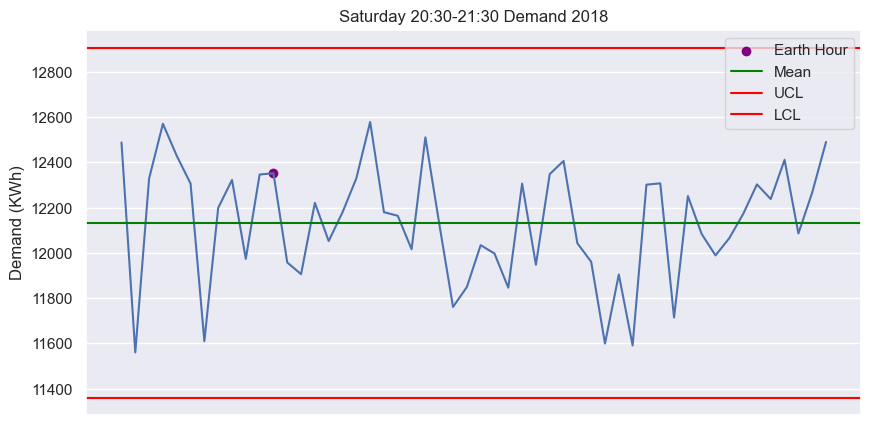

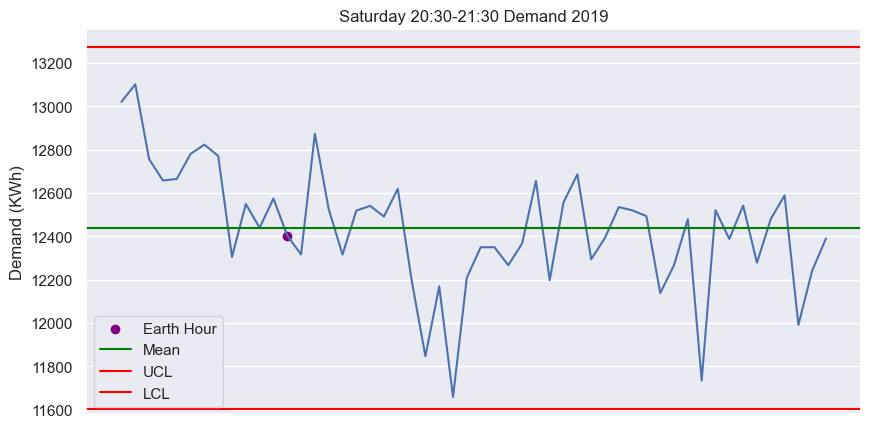

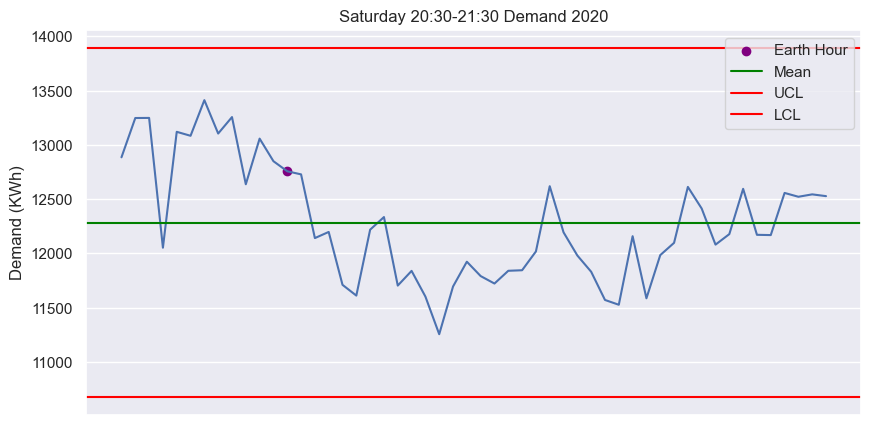

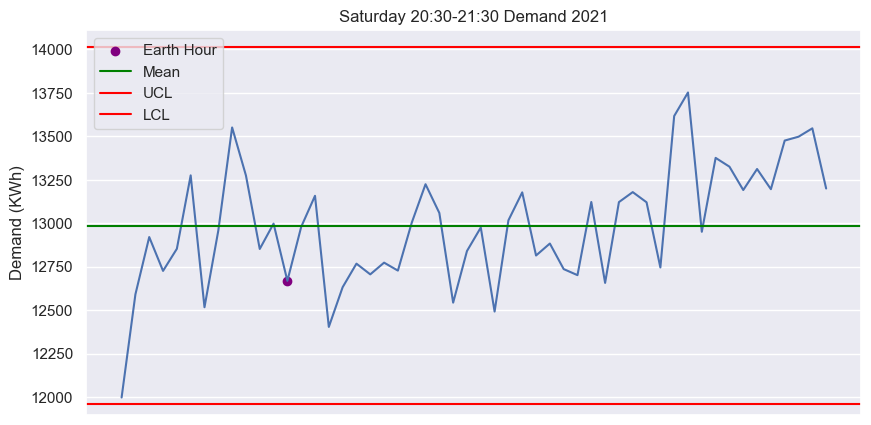

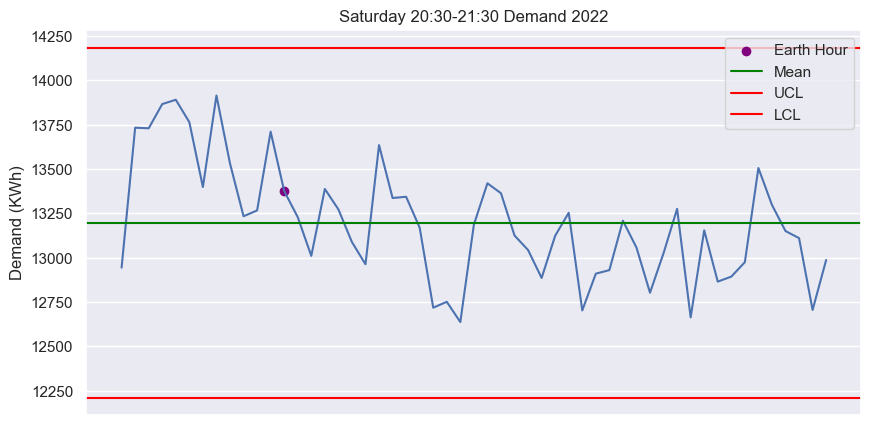

In [54]:
controlchart(2018)  
controlchart(2019)
controlchart(2020)
controlchart(2021)
controlchart(2022)

In [74]:
indices = [i+'-'+str(year) for i in data[2018].index]
collectdf = pd.DataFrame(data[2018].values,index=indices, columns=['Demand'])

for year in range(2019, 2023):
    indices = [i+'-'+str(year) for i in data[year].index]
    collectdf = collectdf.append(pd.DataFrame(data[year].values,index=indices, columns=['Demand']))
collectdf

C:\Users\Ayush\AppData\Local\Temp\ipykernel_5376\1049389399.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  collectdf = collectdf.append(pd.DataFrame(data[year].values,index=indices, columns=['Demand']))
C:\Users\Ayush\AppData\Local\Temp\ipykernel_5376\1049389399.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  collectdf = collectdf.append(pd.DataFrame(data[year].values,index=indices, columns=['Demand']))
C:\Users\Ayush\AppData\Local\Temp\ipykernel_5376\1049389399.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  collectdf = collectdf.append(pd.DataFrame(data[year].values,index=indices, columns=['Demand']))
C:\Users\Ayush\AppData\Local\Temp\ipykernel_5376\1049389399.py:6: FutureWarning: The frame.append method is d

,Demand
06-Jan-2018,12488.099724
13-Jan-2018,11560.310878
20-Jan-2018,12328.823165
27-Jan-2018,12570.592054
03-Feb-2018,12429.107499
...,...
03-Dec-2022,13297.978276
10-Dec-2022,13150.566671
17-Dec-2022,13110.715244
24-Dec-2022,12705.640618


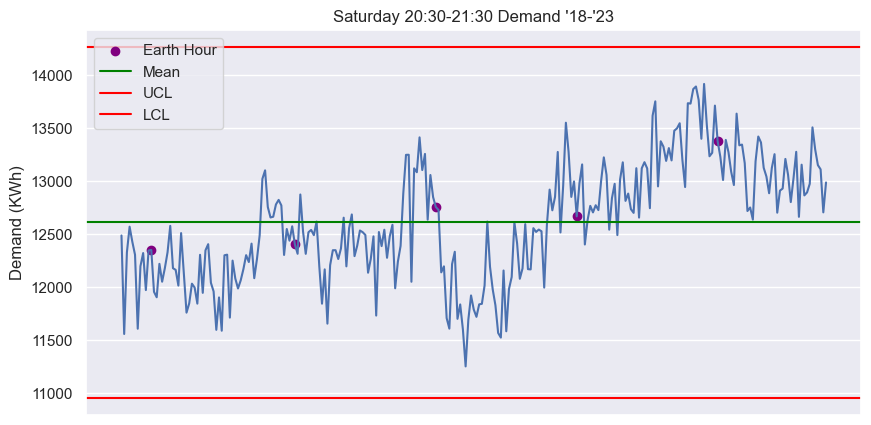

In [84]:
def controlchart(df):
    mean = np.mean(df['Demand'])
    std = np.std(df['Demand'])  
    ucl = mean + 3*std
    lcl = mean - 3*std

    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Demand'])
    plt.scatter([earthhours[year] + f'-{year}' for year in range(2018,2023)], [df.loc[earthhours[year] + f'-{year}'] for year in range(2018,2023)], color='purple', label = 'Earth Hour')
    plt.axhline(mean, color='green', label='Mean')
    plt.axhline(ucl, color='red', label='UCL')
    plt.axhline(lcl, color='red', label='LCL')
    plt.title("Saturday 20:30-21:30 Demand '18-'23")
    # plt.xlabel('Date')
    plt.ylabel('Demand (KWh)')
    plt.xticks([])
    plt.legend()

controlchart(collectdf)